In [1]:
# pytorch workflow
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cpu'

In [2]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [3]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """
    Plots Training data, test data and compares predictions
    """

    plt.figure(figsize=(10,7))
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={'size':14})

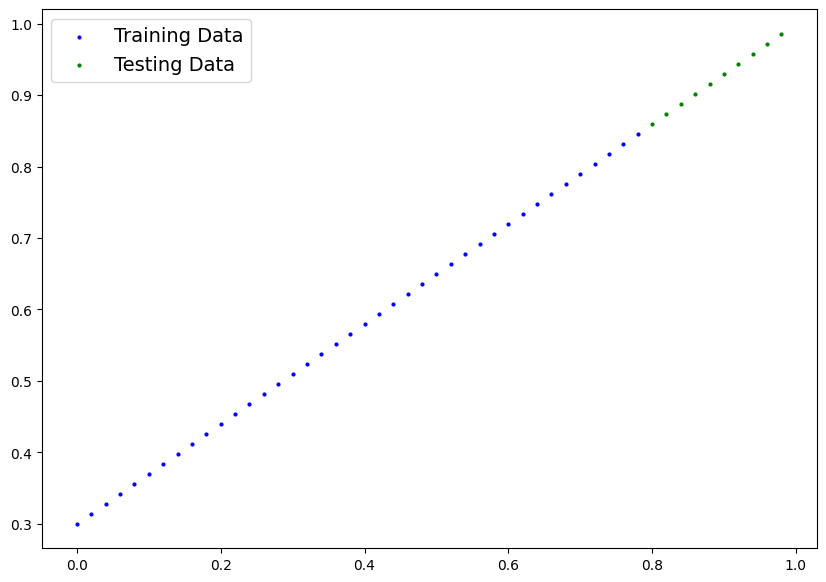

In [5]:
plot_predictions()

In [77]:
## 2. Build model
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
                                               
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [92]:
### Checking the content of our pytorch model
# Creating a random seed

torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [84]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [85]:
### Making prediction using inference_mode()

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

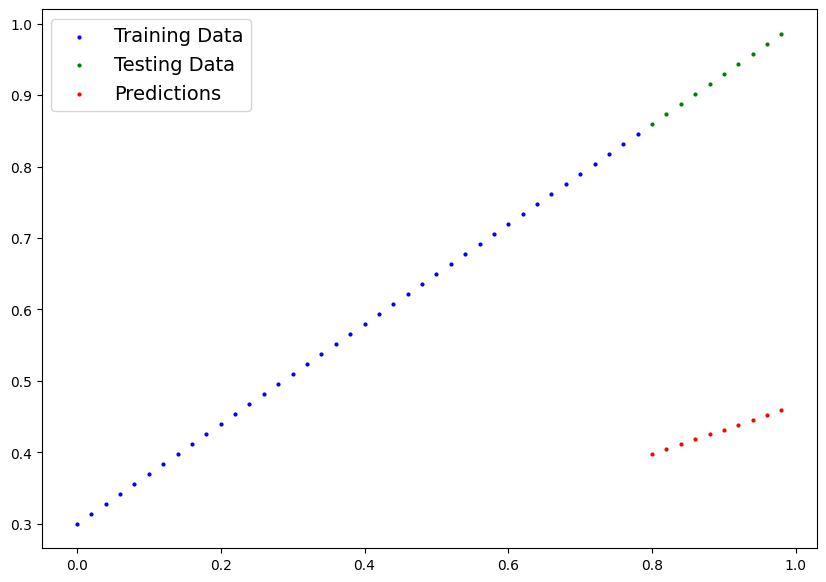

In [10]:
plot_predictions(predictions=y_preds)

In [93]:
## Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [94]:
epochs = 200


# Track Experiments
epochs_count = []
loss_values = []
test_loss_values = []



for epoch in range(epochs):

    model_0.train()

    # Forward Pass
    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        epochs_count.append(epoch)
        loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss)

        if epoch %10 == 0:
            print(f"Epoch: {epoch}, Training Loss: {loss.item()}, Test Loss: {test_loss.item()}")
            print(f"----------------{model_0.state_dict()}")

Epoch: 0, Training Loss: 0.31288138031959534, Test Loss: 0.48106518387794495
----------------OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10, Training Loss: 0.1976713240146637, Test Loss: 0.3463551998138428
----------------OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20, Training Loss: 0.08908725529909134, Test Loss: 0.21729660034179688
----------------OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30, Training Loss: 0.053148526698350906, Test Loss: 0.14464017748832703
----------------OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40, Training Loss: 0.04543796554207802, Test Loss: 0.11360953003168106
----------------OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50, Training Loss: 0.04167863354086876, Test Loss: 0.09919948130846024
----------------OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])


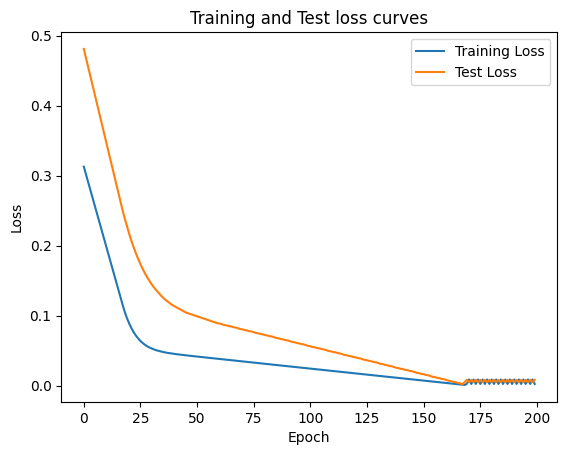

In [95]:
import numpy as np

# Plot the loss curves
plt.plot(epochs_count, loss_values, label="Training Loss")
plt.plot(epochs_count, test_loss_values, label="Test Loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [49]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4455])), ('bias', tensor([0.3718]))])

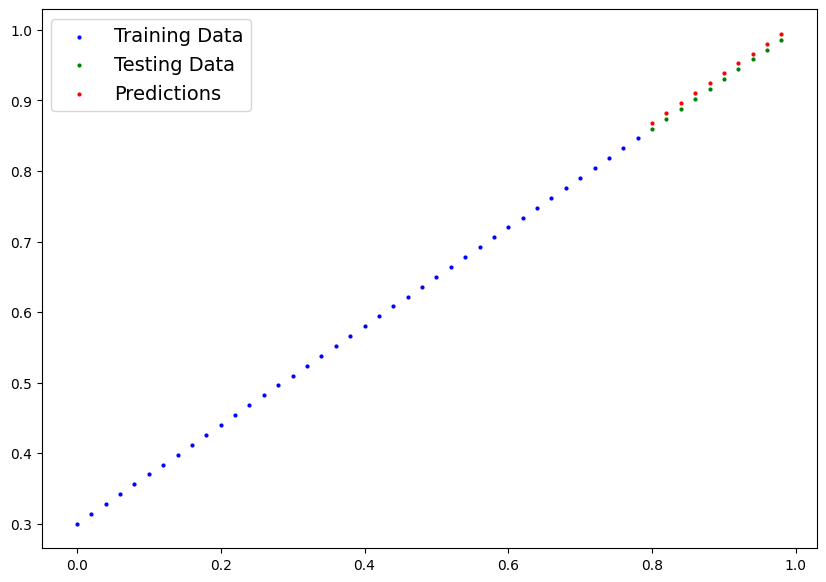

In [88]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds, test_labels=y_test)

In [96]:
# from pathlib import Path

# MODEL_PATH = Path("models")
# MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [97]:
loaded_model_0 = LinearRegressionModel()


loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [98]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [99]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [101]:
!pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu121

Looking in indexes: https://download.pytorch.org/whl/nightly/cu121

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~orch\\lib\\asmjit.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/4.1 MB ? eta -:--:--
     ---                                      0.4/4.1 MB 11.2 MB/s eta 0:00:01
     -------                                  0.8/4.1 MB 10.0 MB/s eta 0:00:01
     -----------                              1.2/4.1 MB 9.5 MB/s eta 0:00:01
     --------------                           1.5/4.1 MB 8.8 MB/s eta 0:00:01
     -------------------                      1.9/4.1 MB 9.5 MB/s eta 0:00:01
     -----------------------                  2.4/4.1 MB 9.5 MB/s eta 0:00:01
     ---------------------------              2.8/4.1 MB 9.3 MB/s eta 0:00:01
     ----------------------------             2.9/4.1 MB 9.3 MB/s eta 0:00:01
     ----------------------------             2.9/4.1 MB 7.5 MB/s eta 0:00:01
     ------------------------------           3.1/4.1 MB 7.2 MB/s eta 0:00:01
     ---------------------------------        3.4/4.1 MB 7.0 MB/s eta 0:00:01
     -------------------------------------    3.8/4.1 MB 7.1 MB/s et

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.0.dev20230922+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
!nvidia-smi

Tue Sep 26 13:51:33 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti   WDDM  | 00000000:07:00.0  On |                  N/A |
| 42%   63C    P0              65W / 250W |    692MiB / 11264MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Create some data using the linear regression formula y = weight * X + bias

weight = 0.7
bias = 0.3

# create a range of values
start = 0
end =1 
step = 0.02

# Create x and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [5]:
# Split data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """
    Plots Training data, test data and compares predictions
    """

    plt.figure(figsize=(10,7))
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={'size':14})

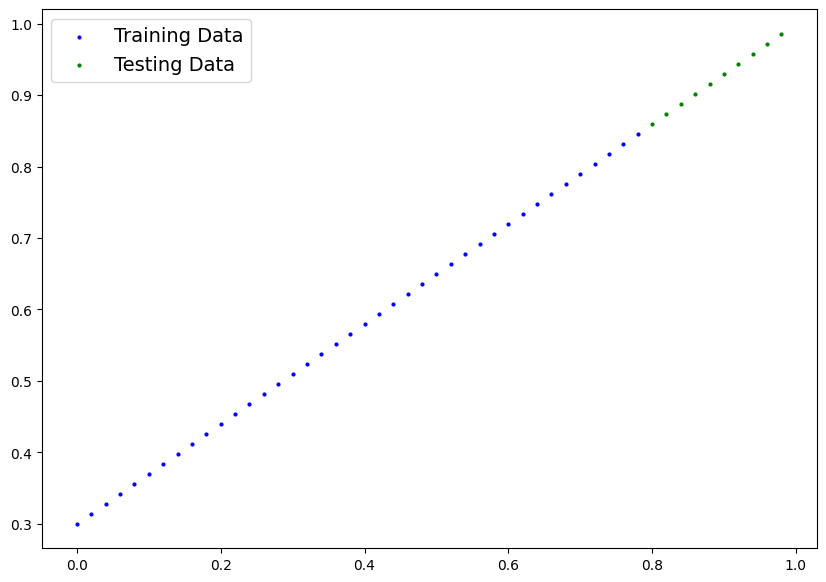

In [8]:
# Plot the data

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [9]:
# create a linear module by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        # use nn.linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))